In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
np.random.seed(42)

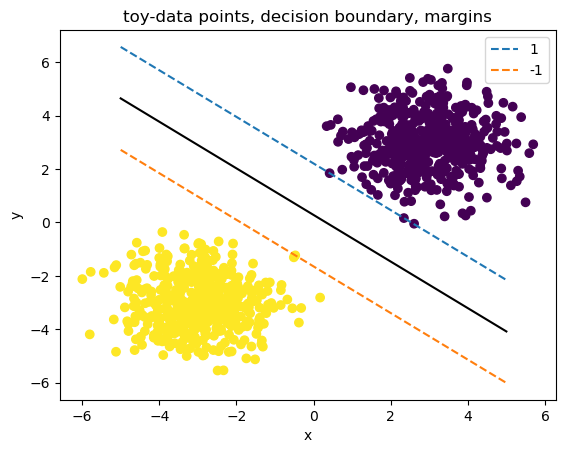

In [2]:
# Extracting Data and Visualization

toy_data = np.load("../data/toy-data.npz")
data = toy_data['training_data']
labels = toy_data['training_labels']

w = [-0.4528, -0.5190]
b = 0.1471

plt.scatter(data[:, 0], data[:, 1], c=labels)

# Plot the decision boundary
x = np.linspace(-5, 5, 100)
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, 'k')

# Plot the margins
y_margin_pos = -(w[0] * x + b + 1) / w[1]
y_margin_neg = -(w[0] * x + b - 1) / w[1]

plt.title("toy-data points, decision boundary, margins")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_margin_pos, linestyle='dashed', label='1')
plt.plot(x, y_margin_neg, linestyle='dashed', label='-1')
plt.legend();

# # Support vectors
# distance_from_boundary = np.abs(np.dot(data, w) + b)

# # Find indices of the support vectors
# support_vector_indices = np.where(distance_from_boundary <= 1)[0]

# # Extract the support vectors
# support_vectors = data[support_vector_indices]
# print(f"Support vectors (x, y): {support_vectors}")

In [3]:
# Data cleaning
mnist_data = np.load("../data/mnist-data.npz")
mnist_training_data = mnist_data['training_data']
mnist_labels = mnist_data['training_labels']

spam_data = np.load(f"../data/spam-data.npz")
spam_training_data = spam_data['training_data']
spam_labels = spam_data['training_labels']

# MNIST shuffling
mnist_randomize = np.arange(len(mnist_training_data))
np.random.shuffle(mnist_randomize)
mnist_training_shuffled = mnist_training_data[mnist_randomize]
mnist_labels_shuffled = mnist_labels[mnist_randomize]

# SPAM shuffling
spam_randomize = np.arange(len(spam_training_data))
np.random.shuffle(spam_randomize)
spam_training_shuffled = spam_training_data[spam_randomize]
spam_labels_shuffled = spam_labels[spam_randomize]

# Validation
mnist_validation = mnist_training_shuffled[:10000]
mnist_validation_labels = mnist_labels_shuffled[:10000]
mnist_training_data = mnist_training_shuffled[10000:]
mnist_training_labels = mnist_labels_shuffled[10000:]

spam_validation = spam_training_shuffled[:int(len(spam_training_data) * 0.2)]
spam_validation_labels = spam_labels_shuffled[:int(len(spam_training_data) * 0.2)]
num = len(spam_training_data)
spam_training_data = spam_training_shuffled[int(num * 0.2):]
spam_training_labels = spam_labels_shuffled[int(num * 0.2):]

In [4]:
# Helper functions
def evaluate(y, y_hat):
    return np.mean(y == y_hat)

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

MNIST_training_accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
MNIST_validation_accuracy: [0.7511, 0.8133, 0.8646, 0.8776, 0.8955, 0.8999, 0.9079]


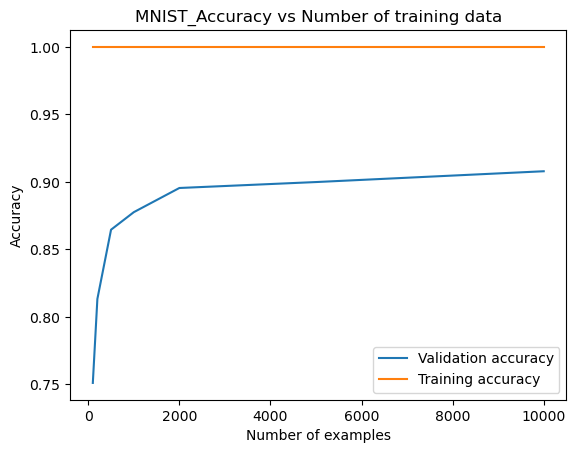

In [5]:
# MNIST Accuracy
mnist_training_reshaped = mnist_training_data.reshape(len(mnist_training_data), -1)
mnist_validation_reshaped = mnist_validation.reshape(len(mnist_validation), -1)
mnist_valid_accuracy = []
mnist_train_accuracy = []

examples = [100, 200, 500, 1000, 2000, 5000, 10000]

# MNIST Plot
for i in examples:
    curr_mnist_training = mnist_training_reshaped[:i]
    curr_mnist_training_labels = mnist_training_labels[:i]
    
    # SVC Model
#     clf = svm.LinearSVC(dual=True)
    clf = svm.SVC(kernel='linear')
    clf.fit(curr_mnist_training, curr_mnist_training_labels)
    training_pred = clf.predict(curr_mnist_training)
    validation_pred = clf.predict(mnist_validation_reshaped)
    
    mnist_valid_accuracy.append(evaluate(mnist_validation_labels, validation_pred))
    mnist_train_accuracy.append(evaluate(curr_mnist_training_labels, training_pred))

    
print(f"MNIST_training_accuracy: {mnist_train_accuracy}")   
print(f"MNIST_validation_accuracy: {mnist_valid_accuracy}")    

plt.title("MNIST_Accuracy vs Number of training data")
plt.xlabel('Number of examples')
plt.ylabel('Accuracy')
plt.plot(examples, mnist_valid_accuracy, label='Validation accuracy');
plt.plot(examples, mnist_train_accuracy, label='Training accuracy')
plt.legend();

/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SPAM_training_accuracy: [0.93, 0.94, 0.914, 0.886, 0.871, 0.8648486664668864]
SPAM_validation_accuracy: [0.7745803357314148, 0.8249400479616307, 0.8657074340527577, 0.8621103117505995, 0.854916067146283, 0.8465227817745803]


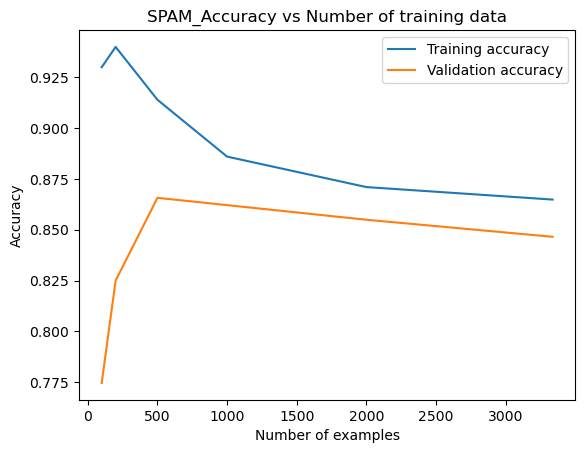

In [6]:
# SPAM Accuracy
spam_training_reshaped = spam_training_data.reshape(len(spam_training_data), -1)
spam_validation_reshaped = spam_validation.reshape(len(spam_validation), -1)
spam_valid_accuracy = []
spam_train_accuracy = []

examples = [100, 200, 500, 1000, 2000, int(len(spam_training_reshaped))]

for i in examples:
    curr_spam_training = spam_training_reshaped[:i]
    curr_spam_training_labels = spam_training_labels[:i]
    
    # SVC Model
    clf = svm.LinearSVC(dual=True)
    clf.fit(curr_spam_training, curr_spam_training_labels)
    training_pred = clf.predict(curr_spam_training)
    validation_pred = clf.predict(spam_validation_reshaped)
    
    spam_train_accuracy.append(evaluate(curr_spam_training_labels, training_pred))
    spam_valid_accuracy.append(evaluate(spam_validation_labels, validation_pred))
  

print(f"SPAM_training_accuracy: {spam_train_accuracy}")   
print(f"SPAM_validation_accuracy: {spam_valid_accuracy}")    

plt.title("SPAM_Accuracy vs Number of training data")
plt.xlabel('Number of examples')
plt.ylabel('Accuracy')
plt.plot(examples, spam_train_accuracy, label='Training accuracy')
plt.plot(examples, spam_valid_accuracy, label='Validation accuracy')
plt.legend();

In [7]:
# Hyperparameter Tuning
num = 15000
mnist_valid_accuracy = []
new_mnist_training_shuffled = mnist_training_shuffled.reshape(len(mnist_training_shuffled), -1)
C_vals = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for C in C_vals:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(new_mnist_training_shuffled[:num], mnist_labels_shuffled[:num])
    valid_pred = clf.predict(mnist_validation_reshaped)
    mnist_valid_accuracy.append([C, evaluate(mnist_validation_labels, valid_pred)])

print(f"The C value and its accuracy: {mnist_valid_accuracy}")
print(f"The best C value: {max(mnist_valid_accuracy, key=lambda item: item[1])[0]}")

The C value and its accuracy: [[1e-07, 0.937], [1e-06, 0.9648], [1e-05, 0.9902], [0.0001, 0.9993], [0.001, 1.0], [0.01, 1.0], [0.1, 1.0], [1, 1.0], [10, 1.0], [100, 1.0]]
The best C value: 0.001


In [5]:
# K-Fold Cross-Validation
total = len(spam_training_shuffled)
k = 5
fold_size = total // k
remainder = total % k

fold_indices = []
start_idx = 0
for i in range(k):
    end_idx = start_idx + fold_size + (1 if i < remainder else 0)
    fold_indices.append((start_idx, end_idx))
    start_idx = end_idx

C_vals = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

validation_accuracy = []

for C in C_vals:
    clf = svm.LinearSVC(C=C, dual=True)
    fold_accuracies = []
    
    for start, end in fold_indices:
        # Validation set
        validation_set = spam_training_shuffled[start:end]
        validation_labels = spam_labels_shuffled[start:end]
        
        # Training set
        train_indices = list(range(start)) + list(range(end, total))
        training_set = spam_training_shuffled[train_indices]
        training_labels = spam_labels_shuffled[train_indices]
        
        clf.fit(training_set, training_labels)
        validation_pred = clf.predict(validation_set)
        fold_accuracies.append(evaluate(validation_labels, validation_pred))
        
    validation_accuracy.append([C, np.mean(fold_accuracies)])
    

best_C = max(validation_accuracy, key=lambda item: item[1])
print(f"The C value and its accuracy: {validation_accuracy}")
print(f"The best C value is {best_C[0]} with an average cross-validation accuracy of {best_C[1]}")

/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: Conv

The C value and its accuracy: [[1e-08, 0.7482623242723185], [1e-07, 0.7485018452304025], [1e-06, 0.7513781070951622], [1e-05, 0.7633650684243024], [0.0001, 0.7784709717256135], [0.001, 0.8022076709889573], [0.01, 0.8333755510561609], [0.1, 0.8503953244589958], [1, 0.8515955140079553], [10, 0.8592673645514726], [100, 0.8676546188199141], [1000, 0.8396117118281424]]
The best C value is 100 with an average cross-validation accuracy of 0.8676546188199141


/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
# MNIST prediction
mnist_test_data = mnist_data['test_data']
mnist_clf = svm.SVC(kernel='linear',C=0.000001)
mnist_clf.fit(mnist_training_shuffled.reshape(len(mnist_training_shuffled), -1), mnist_labels_shuffled)

# Validation part
mnist_valid_predictions = mnist_clf.predict(mnist_validation_reshaped)
print(f"Current model mnist accuracy: {evaluate(mnist_valid_predictions, mnist_validation_labels)}")

# Output
mnist_test_predictions = mnist_clf.predict(mnist_test_data.reshape(len(mnist_test_data), -1))
results_to_csv(mnist_test_predictions)

Current model mnist accuracy: 0.9596


In [11]:
# Spam prediction
spam_test_data = spam_data['test_data']
spam_clf = svm.LinearSVC(C=100, dual=True)
spam_clf.fit(spam_training_shuffled.reshape(len(spam_training_shuffled), -1), spam_labels_shuffled)

# Validation part: repeat until the model is optimal
# 0.9016 Validation accuracy so far highest, 0.87 Test accuracy
spam_valid_predictions = spam_clf.predict(spam_validation_reshaped)
print(f"Current model spam accuracy: {evaluate(spam_valid_predictions, spam_validation_labels)}")

# Output
spam_test_predictions = spam_clf.predict(spam_test_data.reshape(len(spam_test_data), -1))

results_to_csv(spam_test_predictions)

Current model spam accuracy: 0.8633093525179856


/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
# Spam validation, for training data only
# Highest 0.8800
spam_clf = svm.LinearSVC(C=100, dual=True)
spam_clf.fit(spam_training_reshaped, spam_training_labels)

# Output
spam_test_predictions = spam_clf.predict(spam_validation_reshaped)
print(f"spam accuracy: {evaluate(spam_test_predictions, spam_validation_labels)}")

spam accuracy: 0.8705035971223022


/Users/jaychen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
